Importing The Libraries

In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings ('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

import pickle

from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', None)

Read The Dataset

In [3]:
df = pd.read_csv(r'C:\Users\Atharva\Downloads\Promotion_of_Employes\Dataset\emp_promotion.csv')
print('shape of train data {}'.format(df.shape))

shape of train data (54808, 14)


Univariate Analysis

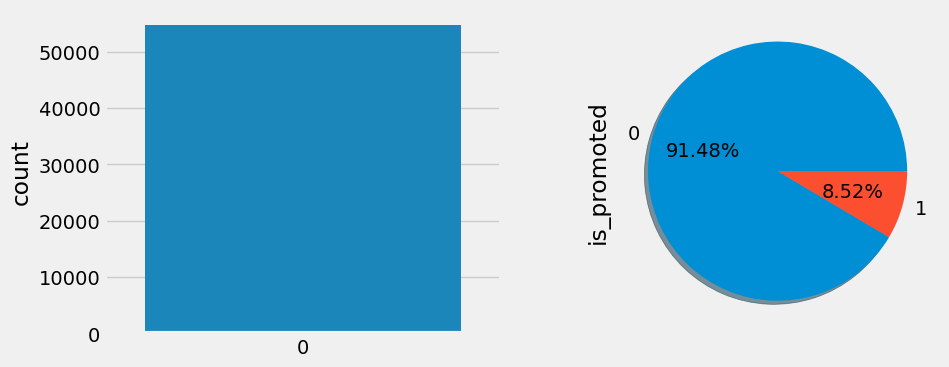

In [4]:
#Data is imbalanced

plt.figure(figsize=(10,4))

plt.subplot(121)

sns.countplot(df['is_promoted'])

plt.subplot(122)

df['is_promoted'].value_counts().plot(kind='pie', autopct = '%.2f%%', shadow=True)

plt.show()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


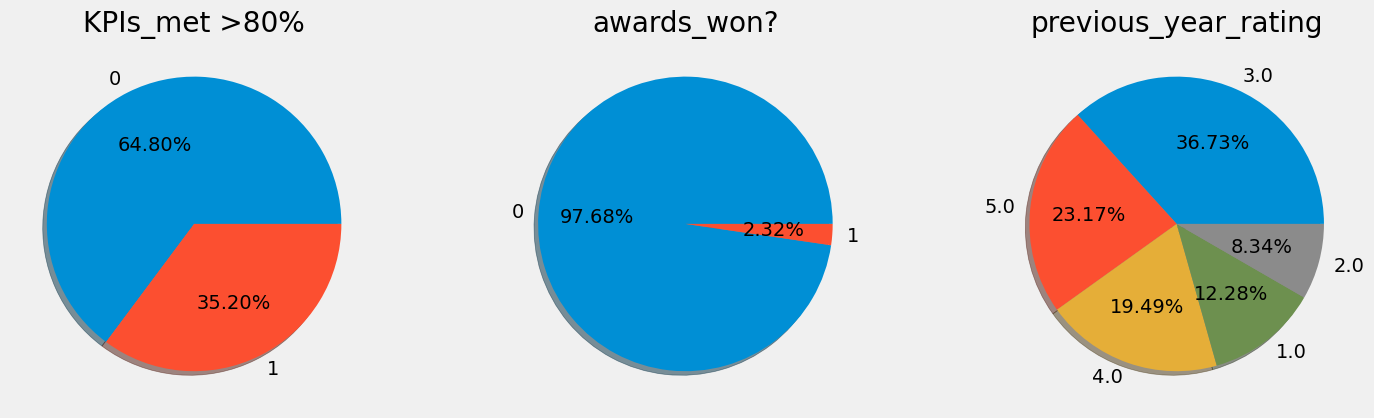

In [50]:

# Check the column names in the dataframe
print(df.columns)

plt.figure(figsize=(16, 10))

# First subplot
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
if 'KPIs_met >80%' in df.columns:
    df['KPIs_met >80%'].value_counts().plot(kind='pie', shadow=True, autopct='%.2f%%')
else:
    print("Column 'KPIs met >80%' not found in dataframe")

# Second subplot
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
if 'awards_won?' in df.columns:
    df['awards_won?'].value_counts().plot(kind='pie', shadow=True, autopct='%.2f%%')
else:
    print("Column 'awards_won?' not found in dataframe")

# Third subplot
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
if 'previous_year_rating' in df.columns:
    df['previous_year_rating'].value_counts().plot(kind='pie', shadow=True, autopct='%.2f%%')
else:
    print("Column 'previous_year_rating' not found in dataframe")

plt.show()


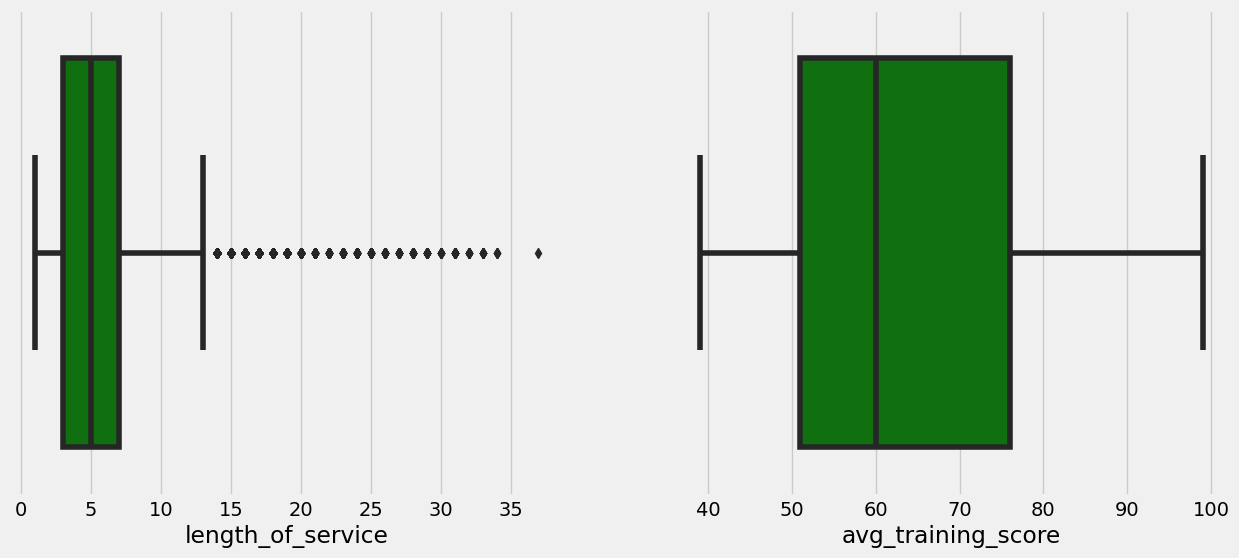

In [5]:
plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(121)
sns.boxplot(x=df['length_of_service'], color='g')

# Second subplot
plt.subplot(122)
sns.boxplot(x=df['avg_training_score'], color='g')

plt.show()

In [6]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

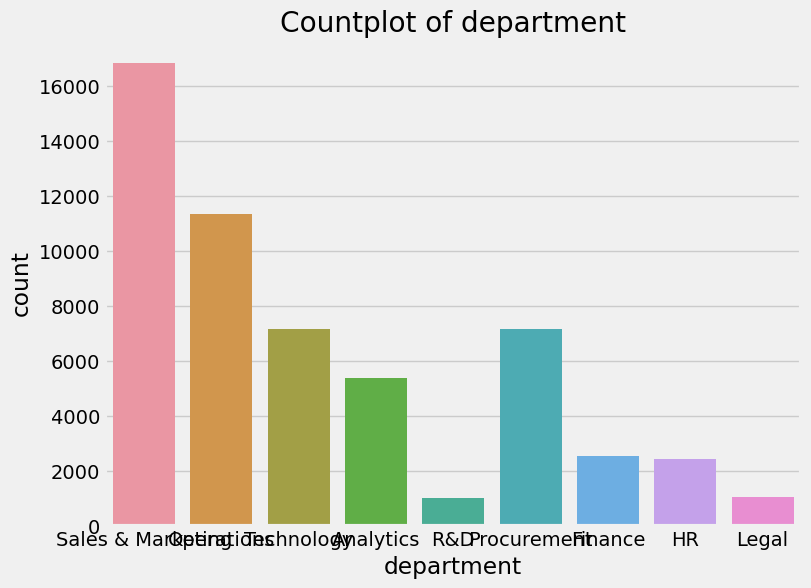

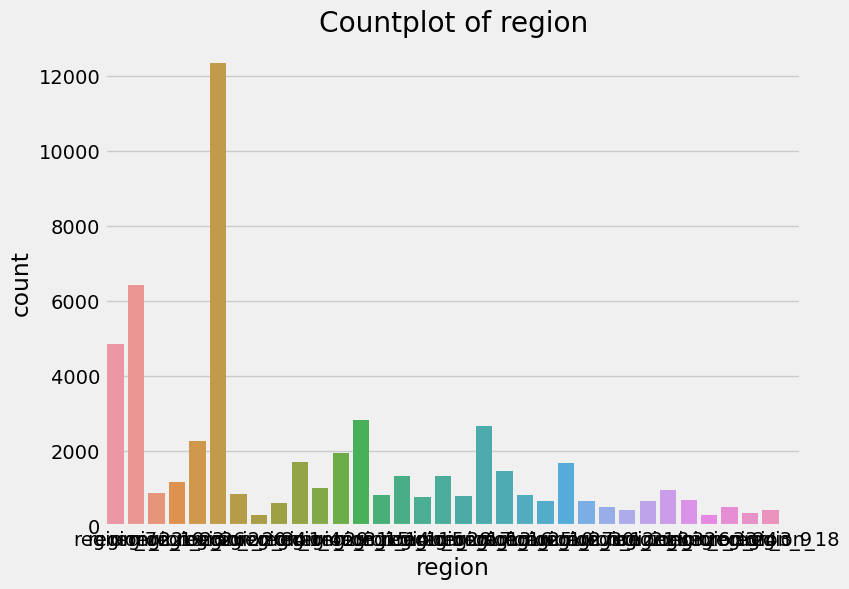

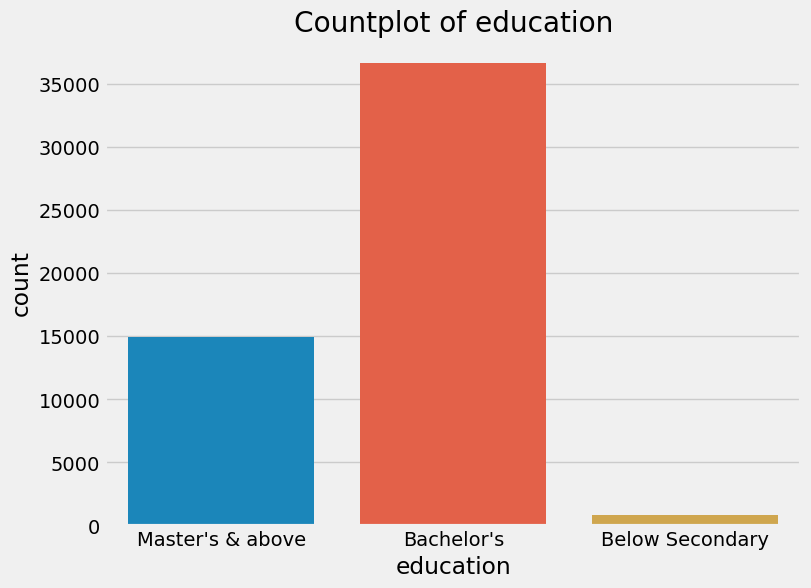

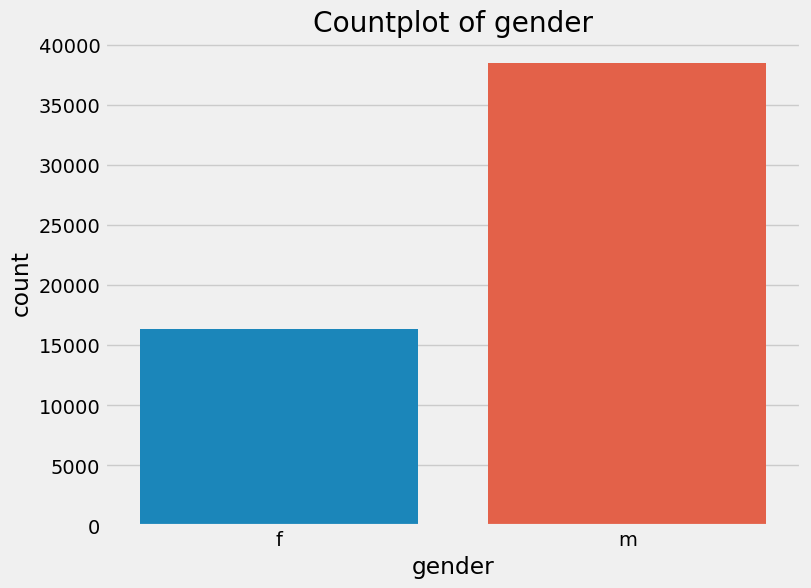

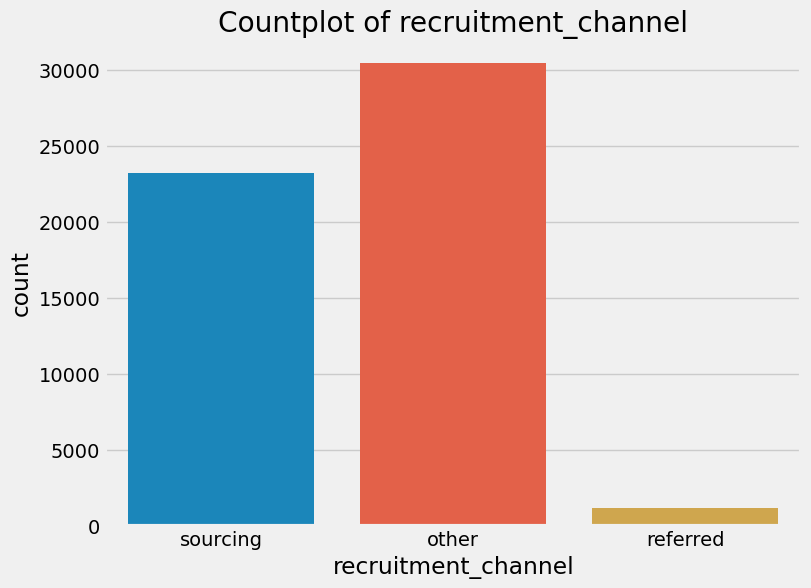

In [7]:
for col in categorical_columns:
    # Bar plot
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, data=df)
  plt.title(f"Countplot of {col}")
  plt.show()

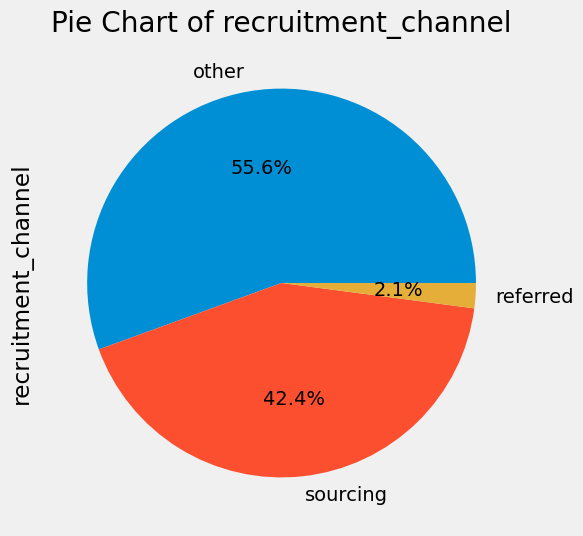

In [8]:
plt.figure(figsize=(8, 6))
df[col].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title(f"Pie Chart of {col}")
plt.show()


Multivariate Analysis

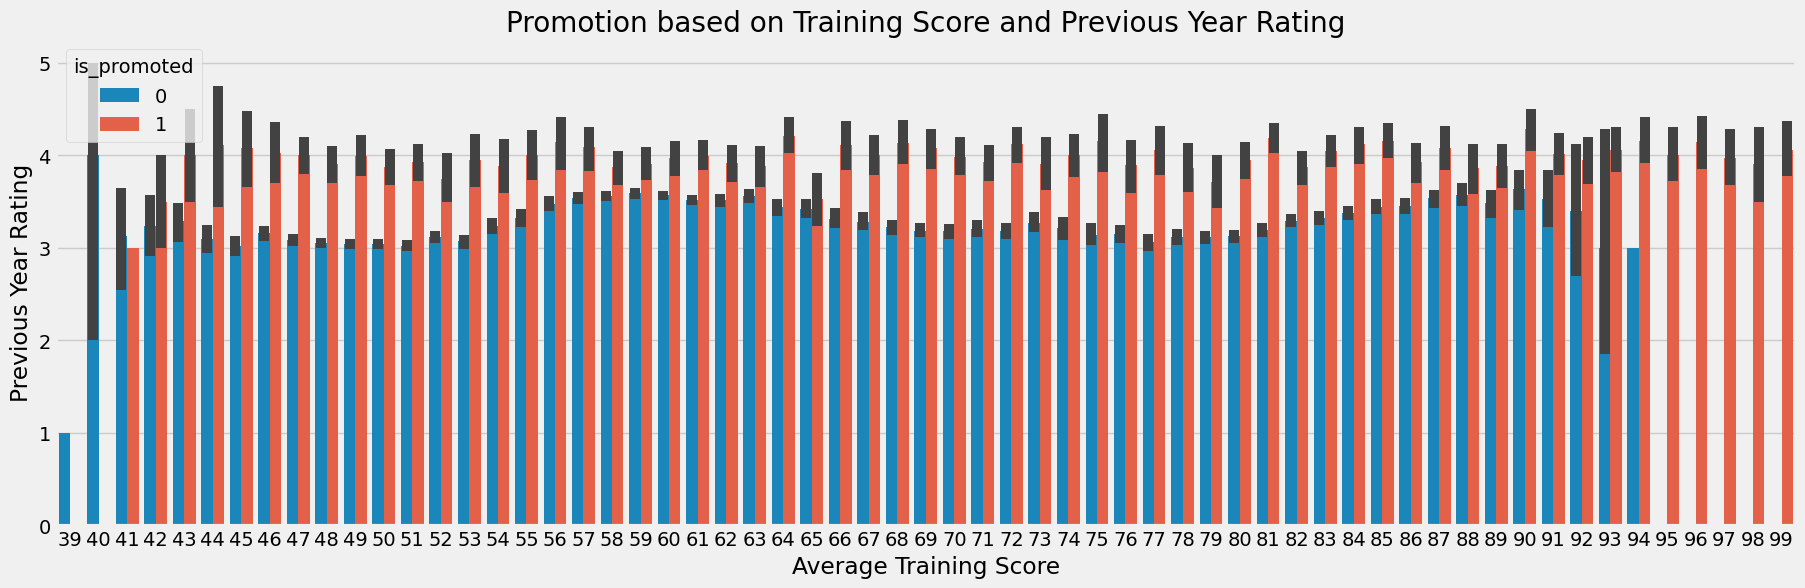

In [9]:
plt.figure(figsize=(20, 6))
sns.barplot(x='avg_training_score', y='previous_year_rating', hue='is_promoted', data=df)

plt.xlabel('Average Training Score')
plt.ylabel('Previous Year Rating')
plt.title('Promotion based on Training Score and Previous Year Rating')
plt.show()

Descriptive Analysis

In [10]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Data Pre-Processing

In [12]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Drop Unwanted Features

In [13]:
df = df.drop(['employee_id', 'gender', 'region', 'recruitment_channel'], axis=1)

Checking For Null Values

In [14]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
print(df['education'].value_counts())
df['education'] = df['education'].fillna(df['education'].mode()[0])

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [16]:
print(df['previous_year_rating'].value_counts())
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


Remove Negative Data

In [17]:
negative = df[(df['KPIs_met >80%'] == 0) & 
              (df['awards_won?'] == 0) & 
              (df['previous_year_rating'] == 1.0) & 
              (df['is_promoted'] == 1) & 
              (df['avg_training_score'] < 60)]
print(negative)

              department   education  no_of_trainings  age  \
31860  Sales & Marketing  Bachelor's                1   27   
51374  Sales & Marketing  Bachelor's                1   31   

       previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
31860                   1.0                  2              0            0   
51374                   1.0                  5              0            0   

       avg_training_score  is_promoted  
31860                  58            1  
51374                  58            1  


In [18]:
df.drop(index=[31860,51374],inplace=True)

Handling Outliers

In [19]:
#Handling outliers

q1 = np.quantile(df['length_of_service'], 0.25) 
q3= np.quantile(df['length_of_service'], 0.75)

IQR = 93-q1

upperBound = (1.5*IQR)+q3 
LowerBound = (1.5*IQR)-q1

print('q1,q1')

print('43:','q93')

print('IQR, IQR')

print('Upper Bound', upperBound)

print('Lower Bound', LowerBound)

print('Skewed data', len (df[df['length_of_service']>upperBound]))

q1,q1
43: q93
IQR, IQR
Upper Bound 142.0
Lower Bound 132.0
Skewed data 0


In [20]:
pd.crosstab([df['length_of_service']>upperBound], df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,50140,4666


In [21]:
df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]

Handling Categorical Values

In [22]:
#Feature mapping is done on education column

#df['education']=df['education'].replace(("Below Secondary", "Bachelor's", "Master's & above"), (1,2,3))
# Feature mapping is done on education column

df['education']=df['education'].replace(("Below Secondary","Bachelor's","Master's & above"),(1,2,3))

lb = LabelEncoder()
df['department']=lb.fit_transform(df['department'])

Handling Imbalanced Data

In [23]:
!pip install --upgrade imbalanced-learn scikit-learn

In [24]:
import pandas as pd

# Assuming df is your DataFrame
x = df.drop('is_promoted', axis=1)
y = df['is_promoted']

print(x.shape)
print(y.shape)
from imblearn.over_sampling import SMOTE
# Perform SMOTE oversampling
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)


(54806, 9)
(54806,)


Text(0.5, 1.0, 'After Oversampling')

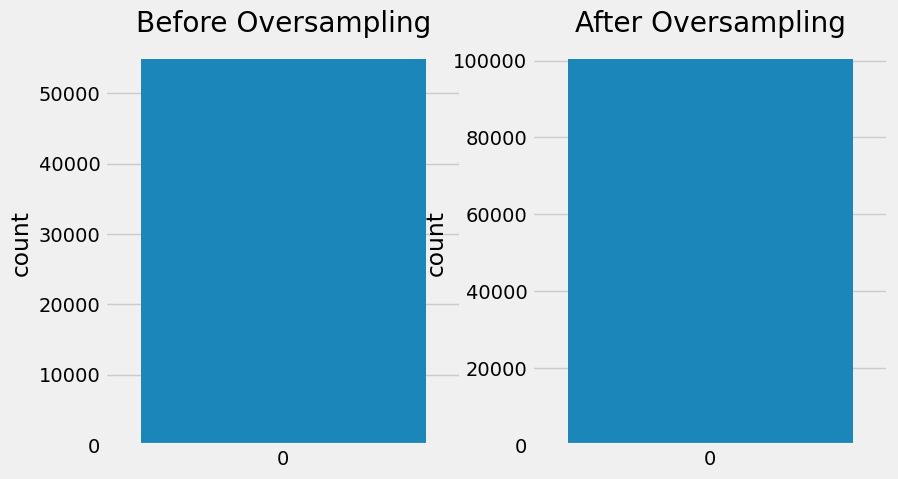

In [75]:
plt.figure(figsize=(9,5))
plt.subplot(121)
sns.countplot(y)
plt.title('Before Oversampling')
plt.subplot(122)
sns.countplot(y_resampled)
plt.title('After Oversampling')

Splitting Data Into Train And Test

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=10)

print('Shape of x_train {}'.format(x_train.shape)) 
print('Shape of y train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (70196, 9)
Shape of y train (70196,)
Shape of x_test (30084, 9)
Shape of y_test (30084,)


Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

def decisionTree(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    
    print('*** DecisionTreeClassifier ***')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))


Random Forest Model

In [27]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    
    print('*** RandomForestClassifier ***')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

KNN Model

In [28]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    
    print('*** KNeighborsClassifier ***')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

Xgboost Model

In [29]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train, y_train)
    
    y_pred = xg.predict(x_test)
    
    print('*** GradientBoostingClassifier ***')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

Compare The Model

In [30]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-' * 100)
    
    randomForest(x_train, x_test, y_train, y_test)
    print('-' * 100)
    
    KNN(x_train, x_test, y_train, y_test)
    print('-' * 100)
    
    xgboost(x_train, x_test, y_train, y_test)


In [31]:
compareModel(x_train,x_test,y_train,y_test)

*** DecisionTreeClassifier ***
Confusion Matrix:
[[13524  1541]
 [  845 14174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     15065
           1       0.90      0.94      0.92     15019

    accuracy                           0.92     30084
   macro avg       0.92      0.92      0.92     30084
weighted avg       0.92      0.92      0.92     30084

----------------------------------------------------------------------------------------------------
*** RandomForestClassifier ***
Confusion Matrix:
[[13887  1178]
 [  763 14256]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     15065
           1       0.92      0.95      0.94     15019

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

---------------------------------------

Evaluating Performance Of The Model And Saving The Model

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [33]:
cv = cross_val_score(rf, x_resampled, y_resampled, cv=5)
print(np.mean(cv))
pickle.dump(rf, open('model.pkl', 'wb'))

0.9388113282808137
